In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [ ]:
def estimate_normals(image):
    grad_x = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)
    grad_y = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)
    light_direction = np.array([0, 0, 1])
    normals = np.stack((-grad_x, -grad_y, np.ones_like(grad_x)), axis=-1)
    norm = np.linalg.norm(normals, axis=-1, keepdims=True)
    normals /= norm
    return normals

In [2]:
def reconstruct_depth_map(normals):
    depth_map = np.zeros(normals.shape[:2], dtype=np.float32)
    for i in range(1, normals.shape[0]):
        depth_map[i, :] = depth_map[i - 1, :] + normals[i, :, 2]  # Accumulate along y-axis
    for j in range(1, normals.shape[1]):
        depth_map[:, j] = depth_map[:, j - 1] + normals[:, j, 2]  # Accumulate along x-axis
    return depth_map

In [3]:
def reconstruct_depth_map(normals):
    depth_map = np.zeros(normals.shape[:2], dtype=np.float32)
    for i in range(1, normals.shape[0]):
        depth_map[i, :] = depth_map[i - 1, :] + normals[i, :, 2]  # Accumulate along y-axis
    for j in range(1, normals.shape[1]):
        depth_map[:, j] = depth_map[:, j - 1] + normals[:, j, 2]  # Accumulate along x-axis
    return depth_map

In [4]:
def plot_3d_reconstruction(depth_map, image):
    x = np.arange(0, depth_map.shape[1])
    y = np.arange(0, depth_map.shape[0])
    x, y = np.meshgrid(x, y)
    fig = plt.figure(figsize=(10, 7))
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(x, y, depth_map, facecolors=plt.cm.gray(image), cmap='viridis', edgecolor='none')
    ax.set_title('Reconstructed 3D Image from Shape from Shading')
    ax.set_xlabel('X-axis')
    ax.set_ylabel('Y-axis')
    ax.set_zlabel('Depth')
    plt.show()

In [5]:
def shape_from_shading(image_path):
    image = preprocess_image(image_path)
    normals = estimate_normals(image)
    depth_map = reconstruct_depth_map(normals)
    plot_3d_reconstruction(depth_map, image)
image_path = 'hairline-crack-wall.jpg'  
shape_from_shading(image_path)

NameError: name 'estimate_normals' is not defined

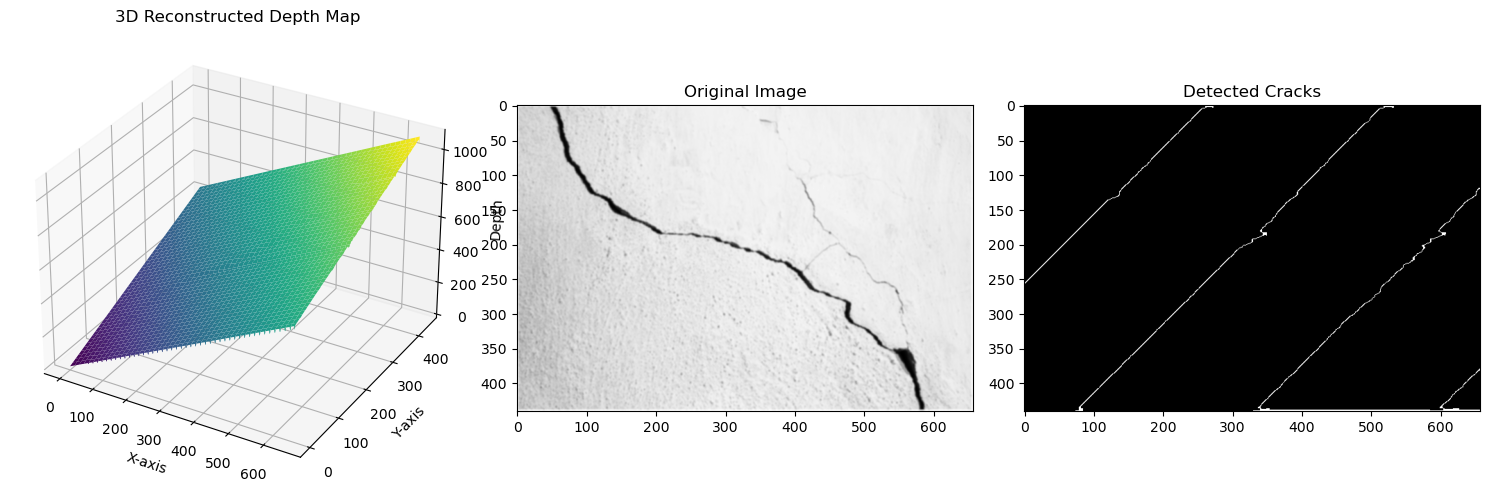

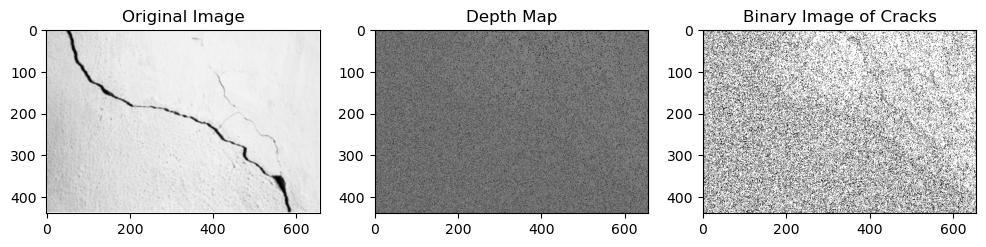

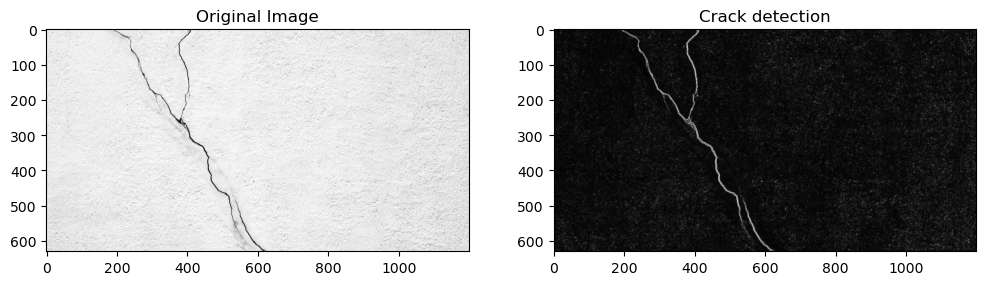

In [13]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def preprocess_image(image_path):
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    normalized_image = cv2.normalize(image, None, 0, 255, cv2.NORM_MINMAX)
    return normalized_image
def compute_gradients(image):
    grad_x = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)
    grad_y = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)
    gradient_magnitude = np.sqrt(grad_x**2 + grad_y**2)
    return gradient_magnitude

def main(image_path):
    image = preprocess_image(image_path)
    gradient_magnitude = compute_gradients(image)
    plt.figure(figsize=(12, 12))
    plt.subplot(1, 2, 1)
    plt.title('Original Image')
    plt.imshow(image, cmap='gray')
    plt.subplot(1, 2, 2)
    plt.title('Crack detection')
    plt.imshow(gradient_magnitude, cmap='gray')
    plt.show()
image_path = 'wall-crack.png'  
main(image_path)
